<a href="https://colab.research.google.com/github/Mr-Royce-IV/Tv_Shows-Research-Projectt/blob/main/Tv_show_dataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Section: Setting up && cleaning dataset

In [ ]:
#Importing All neccessary libraries
import warnings
warnings.filterwarnings('ignore')

import random


!pip install pandas
import pandas as pd

!pip install numpy
import numpy as np

# Set seed for reproducibility
random.seed(123)
np.random.seed(123)


# Function to introduce random NaNs
def introduce_nan(series, nan_fraction=0.1):
    n_nan = int(len(series) * nan_fraction)
    nan_indices = random.sample(range(len(series)), n_nan)
    series.iloc[nan_indices] = np.nan
    return series

!pip install matplotlib
import matplotlib.pyplot as plt

!pip install seaborn
import seaborn as sns

# Create sample data
data = np.random.rand(10, 10)  # 10x10 matrix with random values

!pip install scikit-learn
from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest

In [ ]:
#Forming & checking the office DataFrame
url = 'https://raw.githubusercontent.com/dsollberger/quartoblog/master/posts/office_sentiment/office_sentiment.csv'
office_df = pd.read_csv(url)

office_df.head()
#office_df.tail()

,index,season,episode,episode_name,director,writer,character,text,text_w_direction,imdb_rating,total_votes,air_date,sentimentAnalysis_score,sentimentr_score,syuzhet_score
0,1,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,All right Jim. Your quarterlies look very good...,All right Jim. Your quarterlies look very good...,7.6,3706,2005-03-24,0.285714,0.134552,2.15
1,2,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Oh, I told you. I couldn't close it. So...","Oh, I told you. I couldn't close it. So...",7.6,3706,2005-03-24,0.000000,0.461880,0.00
2,3,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,So you've come to the master for guidance? Is ...,So you've come to the master for guidance? Is ...,7.6,3706,2005-03-24,0.428571,0.603738,0.50
3,4,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Actually, you called me in here, but yeah.","Actually, you called me in here, but yeah.",7.6,3706,2005-03-24,0.000000,0.244949,0.00
4,5,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,"All right. Well, let me show you how it's done.","All right. Well, let me show you how it's done.",7.6,3706,2005-03-24,0.400000,0.000000,1.60


In [ ]:
#Checking for dataframe issues
office_df.info()

office_df.describe()

office_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55130 entries, 0 to 55129
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    55130 non-null  int64  
 1   season                   55130 non-null  int64  
 2   episode                  55130 non-null  int64  
 3   episode_name             55130 non-null  object 
 4   director                 55130 non-null  object 
 5   writer                   55130 non-null  object 
 6   character                55130 non-null  object 
 7   text                     54753 non-null  object 
 8   text_w_direction         55125 non-null  object 
 9   imdb_rating              55130 non-null  float64
 10  total_votes              55130 non-null  int64  
 11  air_date                 55130 non-null  object 
 12  sentimentAnalysis_score  51718 non-null  float64
 13  sentimentr_score         55130 non-null  float64
 14  syuzhet_score         

,0
index,0
season,0
episode,0
episode_name,0
director,0
writer,0
character,0
text,377
text_w_direction,5
imdb_rating,0


In [ ]:
#Use statistical methods to identify and handle outliers
outlier_character = office_df[(pd.to_numeric(office_df['character'], errors='coerce') < 13) | (pd.to_numeric(office_df['character'], errors='coerce') > 20)]
print(outlier_character)

outlier_writer = office_df[(pd.to_numeric(office_df['writer'], errors='coerce') < 13) | (pd.to_numeric(office_df['writer'], errors='coerce') > 20)]


outlier_episode_name = office_df[(pd.to_numeric(office_df['episode_name'], errors='coerce') < 13) | (pd.to_numeric(office_df['episode_name'], errors='coerce') > 20)]


outlier_director = office_df[(pd.to_numeric(office_df['director'], errors='coerce') < 13) | (pd.to_numeric(office_df['director'], errors='coerce') > 20)]


outlier_text = office_df[(pd.to_numeric(office_df['text'], errors='coerce') < 13) | (pd.to_numeric(office_df['text'], errors='coerce') > 20)]


outlier_text_w_direction = office_df[(pd.to_numeric(office_df['text_w_direction'], errors='coerce') < 13) | (pd.to_numeric(office_df['text_w_direction'], errors='coerce') > 20)]


outlier_air_date = office_df[(pd.to_numeric(office_df['air_date'], errors='coerce') < 13) | (pd.to_numeric(office_df['air_date'], errors='coerce') > 20)]


#Example on how to do
#outlier_grade = df[(pd.to_numeric(df['grade'], errors='coerce') < 13) | (pd.to_numeric(df['grade'], errors='coerce') > 20)]
#print(outlier_grade)

Empty DataFrame
Columns: [index, season, episode, episode_name, director, writer, character, text, text_w_direction, imdb_rating, total_votes, air_date, sentimentAnalysis_score, sentimentr_score, syuzhet_score]
Index: []


In [ ]:
outlier_sentimentAnalysis = office_df[(office_df['sentimentAnalysis_score'].isna()) | (office_df['sentimentAnalysis_score'] == 'incomplete')]
print(outlier_sentimentAnalysis)

       index  season  episode episode_name    director  \
9         10       1        1        Pilot  Ken Kwapis   
24        25       1        1        Pilot  Ken Kwapis   
44        45       1        1        Pilot  Ken Kwapis   
85        86       1        1        Pilot  Ken Kwapis   
86        87       1        1        Pilot  Ken Kwapis   
...      ...     ...      ...          ...         ...   
55032  55033       9       24       Finale  Ken Kwapis   
55050  55051       9       24       Finale  Ken Kwapis   
55082  55083       9       24       Finale  Ken Kwapis   
55089  55090       9       24       Finale  Ken Kwapis   
55100  55101       9       24       Finale  Ken Kwapis   

                                            writer character  \
9      Ricky Gervais;Stephen Merchant;Greg Daniels       Pam   
24     Ricky Gervais;Stephen Merchant;Greg Daniels   Michael   
44     Ricky Gervais;Stephen Merchant;Greg Daniels   Michael   
85     Ricky Gervais;Stephen Merchant;Greg Dani

In [ ]:
#dropping null objects & inputting null ints/floats
mean_sentiment = office_df['sentimentAnalysis_score'].median()
office_df['sentimentAnalysis_score'] = office_df['sentimentAnalysis_score'].fillna(mean_sentiment)

office_df_clean = office_df.dropna(subset=['text', 'text_w_direction'])

office_df_clean.columns

office_df_clean.drop('index', axis=1)

office_df_clean.isnull().sum()




#office_df_clean['sentimentAnalysis_score']
#office_df.head()
#office_df.info()
#office_df.dropna(inplace=True)
#office_df.fillna({'sentimentAnalysis_score': 'Incomplete'})
#mean_age = messy_df['age'].mean()
#mean_age
#messy_df['age'] = messy_df['age'].fillna(mean_age)
#messy_df['age']

,0
index,0
season,0
episode,0
episode_name,0
director,0
writer,0
character,0
text,0
text_w_direction,0
imdb_rating,0


In [ ]:
#dropping duplicates

office_df_clean = office_df_clean.drop_duplicates()

# Find the pearson correlations matrix
print(office_df_clean.corr(numeric_only=True))

#print(office_df_clean)

                            index    season   episode  imdb_rating  \
index                    1.000000  0.990374  0.222957    -0.345286   
season                   0.990374  1.000000  0.115315    -0.357501   
episode                  0.222957  0.115315  1.000000     0.201713   
imdb_rating             -0.345286 -0.357501  0.201713     1.000000   
total_votes             -0.311300 -0.337931  0.072306     0.678289   
sentimentAnalysis_score -0.003609 -0.005462  0.008027     0.003100   
sentimentr_score        -0.018369 -0.018237 -0.008529     0.011136   
syuzhet_score           -0.008501 -0.011267  0.005381     0.003375   

                         total_votes  sentimentAnalysis_score  \
index                      -0.311300                -0.003609   
season                     -0.337931                -0.005462   
episode                     0.072306                 0.008027   
imdb_rating                 0.678289                 0.003100   
total_votes                 1.000000        

In [ ]:
#standardize Code
from sklearn.preprocessing import StandardScaler

# Select only numerical columns
numerical_cols = office_df_clean.select_dtypes(include=np.number).columns
df_numerical = office_df_clean[numerical_cols]

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), columns=numerical_cols)

print("7. Standardizing Data:")
display(df_scaled.head())
print("\n")

quantiles = df_scaled.quantile([0.25, 0.5, 0.75])
iqr = quantiles.loc[0.75] - quantiles.loc[0.25]

print("Quantiles and IQR:")
display(quantiles)
print('\nIQR:')
display(iqr)

7. Standardizing Data:


,index,season,episode,imdb_rating,total_votes,sentimentAnalysis_score,sentimentr_score,syuzhet_score
0,-1.731734,-1.936946,-1.58406,-1.277134,1.716176,0.625381,0.281191,2.687800
1,-1.731671,-1.936946,-1.58406,-1.277134,1.716176,-0.296698,1.523321,-0.340612
2,-1.731608,-1.936946,-1.58406,-1.277134,1.716176,1.086421,2.061639,0.363670
3,-1.731545,-1.936946,-1.58406,-1.277134,1.716176,-0.296698,0.700120,-0.340612
4,-1.731482,-1.936946,-1.58406,-1.277134,1.716176,0.994213,-0.229403,1.913090




Quantiles and IQR:


,index,season,episode,imdb_rating,total_votes,sentimentAnalysis_score,sentimentr_score,syuzhet_score
0.25,-0.866333,-1.083094,-0.898615,-0.731248,-0.605696,-0.296698,-0.229403,-0.340612
0.50,0.000765,0.197685,-0.076082,-0.003400,-0.237199,-0.296698,-0.229403,-0.340612
0.75,0.866795,0.624612,0.883540,0.724449,0.256745,0.348758,0.244942,0.504526



IQR:


,0
index,1.733127
season,1.707705
episode,1.782155
imdb_rating,1.455697
total_votes,0.862442
sentimentAnalysis_score,0.645455
sentimentr_score,0.474345
syuzhet_score,0.845138


#Potential Research Questions

#Main potential question: How character interaction and dialgoue sentiment evolves across seasons and how it reveals about the overall shift in narrative and character development trends?

#1. Which characters have the most emotionally charged dialogue?

#2. Who's the characters with the most and least dialogues and how does that affect the sentiment analysis of that line?

#3. Does sentiment vary between diffrent types of episodes(holiday, workplace conflict, romance, etc)?




#New Research Questions

#1. How does the overall sentiment of episodes evolve across seasons?

#2. How do sentiment score reflect character growth?

#3. Can changes in sentiment scores predict turning points in key relationships?

#4. Do high-sentiment episodes correlate with higher imbs ratings?

#5. Does the sentiment score depend on the office's writer?

#6. Does the sentiment score depend on the show's episode theme?

#7. Which season indicates the worst and best sentiment scores?

#Chosen Research Questions && Backups

1.  Do high-sentiment episodes correlate with higher imbs ratings?

2. How does the overall sentiment of episodes evolve across seasons?

#Backups

1. Who's the characters with the most and least dialogues and how does that affect the sentiment analysis of that line?

2. Does sentiment vary between diffrent types of episodes(holiday, workplace conflict, romance, etc)

 christmas episodes: season 2 - episode 10, season 3 - episode 10 & 11, season 4 - episode 11, season 5 - episode 11, season 6 -episode 11 & 12, season 7 - episode 10, season 8 - episode 11, season 9 - episode 10

romance/valentine episodes : season 2 - episode 16, season 5 - episode 18, season 6 - episode 16, season 7 - 16, season 8 - episode 14, season 9 - episode 15

 Conflict episodes: Every other episodes

In [ ]:
#Grouping the seasons and episodes & in correlation to sentiment score

grouped_seasonEpisode = office_df_clean.groupby('season')['episode_name'].sum()

#office_df_clean.groupby(['season', 'episode_name'])['sentimentAnalysis_score'].mean()

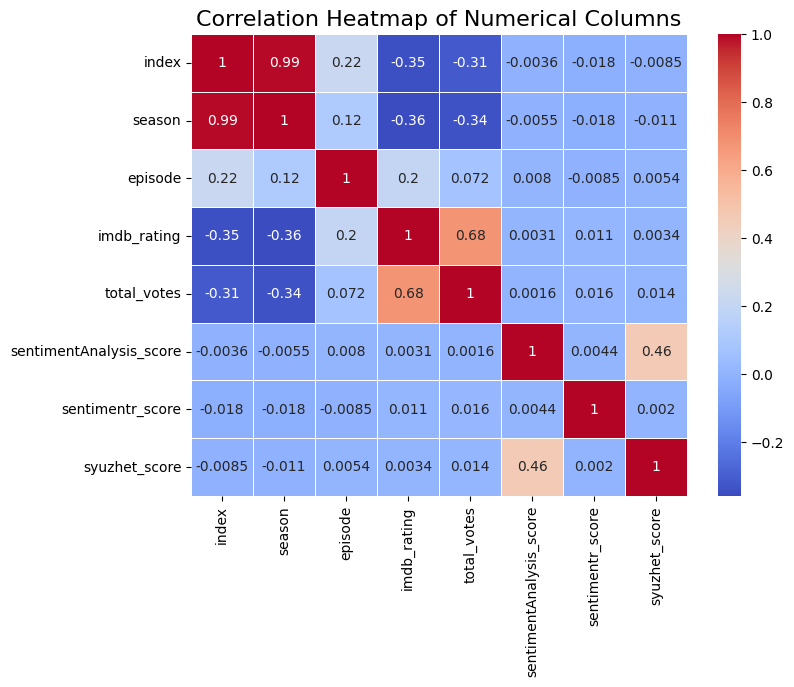

In [ ]:
#Do high-sentiment episodes correlate with higher imbs ratings?

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numerical columns
numerical_cols = office_df_clean.select_dtypes(include=np.number).columns
#numerical_cols = office_df_clean.groupby(['season', 'episode_name'])['sentimentAnalysis_score'].mean()
df_numerical = office_df_clean[numerical_cols]

# Plot the heatmap of the correlation matrix of numerical columns
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Columns", fontsize=16)
plt.show()